<a href="https://colab.research.google.com/github/oscar066/ComputerVision_Cats_Dogs/blob/main/ComputerVision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
import tensorflow_datasets as tfds
import tensorflow as tf

In [3]:
dataset_name = 'cats_vs_dogs'
dataset_builder = tfds.builder(dataset_name)
dataset_builder.download_and_prepare()

# load the dataset and splits (train , validation,  test)
dataset = dataset_builder.as_dataset(split=['train[:80%]', 'train[80%:90%]', 'train[90:]'], shuffle_files=True)

# Extract the train , validation and test splits
train_dataset = dataset[0]
validation_dataset = dataset[1]
test_dataset = dataset[2]

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/4.0.0.incompleteCZMHUW/cats_vs_dogs-train.tfrecord*...:   0%|…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.0. Subsequent calls will reuse this data.


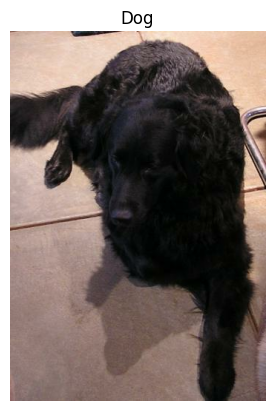

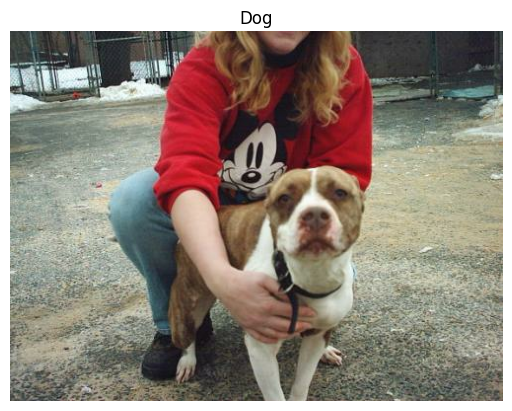

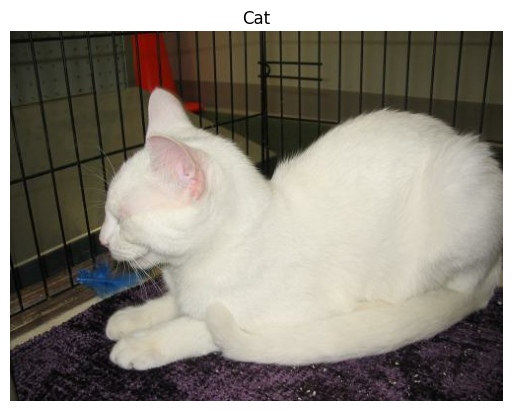

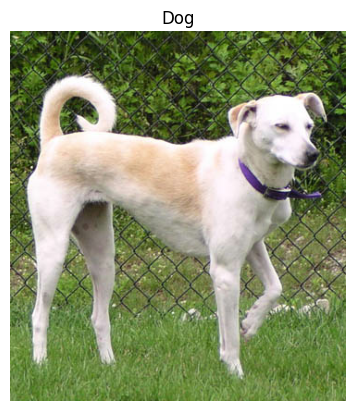

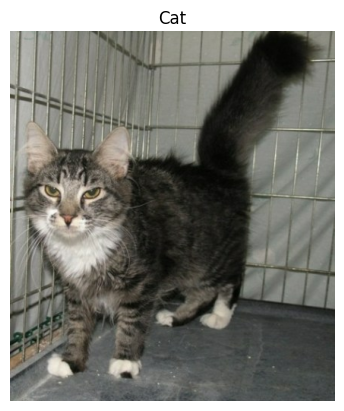

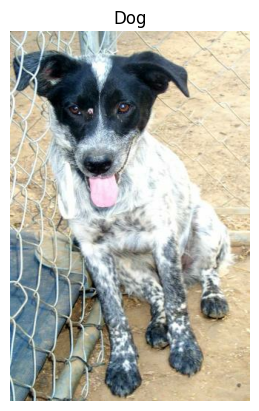

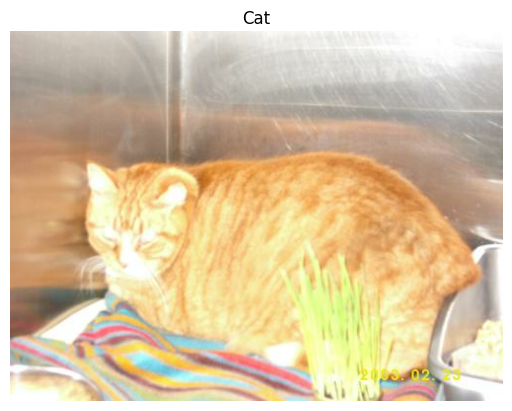

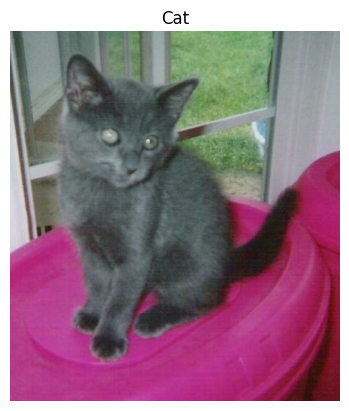

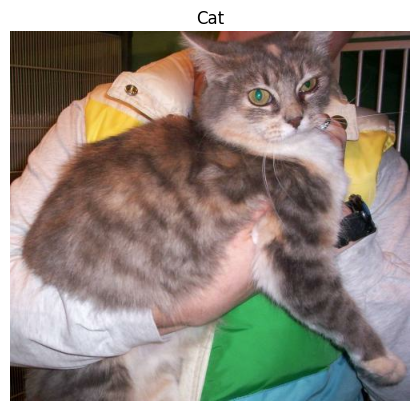

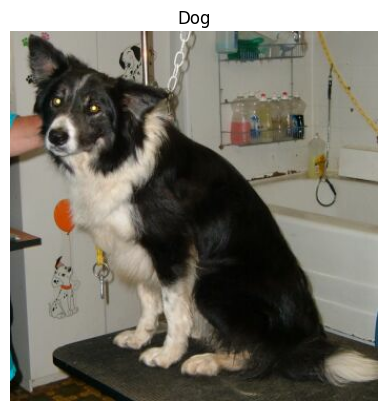

In [11]:
# Inspect a few samples from the train dataset
num_samples = 10

# Iterate over the train dataset and display the samples 
for sample in train_dataset.take(num_samples):
  image = sample['image']
  label = sample['label']

  # convert the image tensor to a numpy array
  image = image.numpy()

  # convert the label into a string 
  label = 'Cat' if label == 0 else 'Dog'

  # Display the image and label
  plt.imshow(image)
  plt.title(label)
  plt.axis('off')
  plt.show()

In [ ]:
# Get the information about the dataset
info = dataset_builder.info

# Get the size of the images
image_size = info.features["image"].shape
print("Image size:", image_size)


In [21]:
# Get information about the dataset
info = dataset_builder.info

print(" Dataset Information: \n", info)
print("Image Size:" ,info.features["image"].shape)


 Dataset Information: 
 tfds.core.DatasetInfo(
    name='cats_vs_dogs',
    full_name='cats_vs_dogs/4.0.0',
    description="""
    A large set of images of cats and dogs. There are 1738 corrupted images that are dropped.
    """,
    homepage='https://www.microsoft.com/en-us/download/details.aspx?id=54765',
    data_path='/root/tensorflow_datasets/cats_vs_dogs/4.0.0',
    file_format=tfrecord,
    download_size=786.67 MiB,
    dataset_size=689.64 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'image/filename': Text(shape=(), dtype=string),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=23262, num_shards=8>,
    },
    citation="""@Inproceedings (Conference){asirra-a-captcha-that-exploits-interest-aligned-manual-image-categorization,
    author = {Elson, Jeremy and Douceur, John (JD) 